<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Assignments/Assignment_3_(Q_2_PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment details

Assignment number: 3 (Q.2 - PCA)

Course: EE 769 (Introduction to Machine Learning)

Instructor: [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)

Student name: Tejas Chaudhari

Student roll number: 10D110017


# Assignment questions
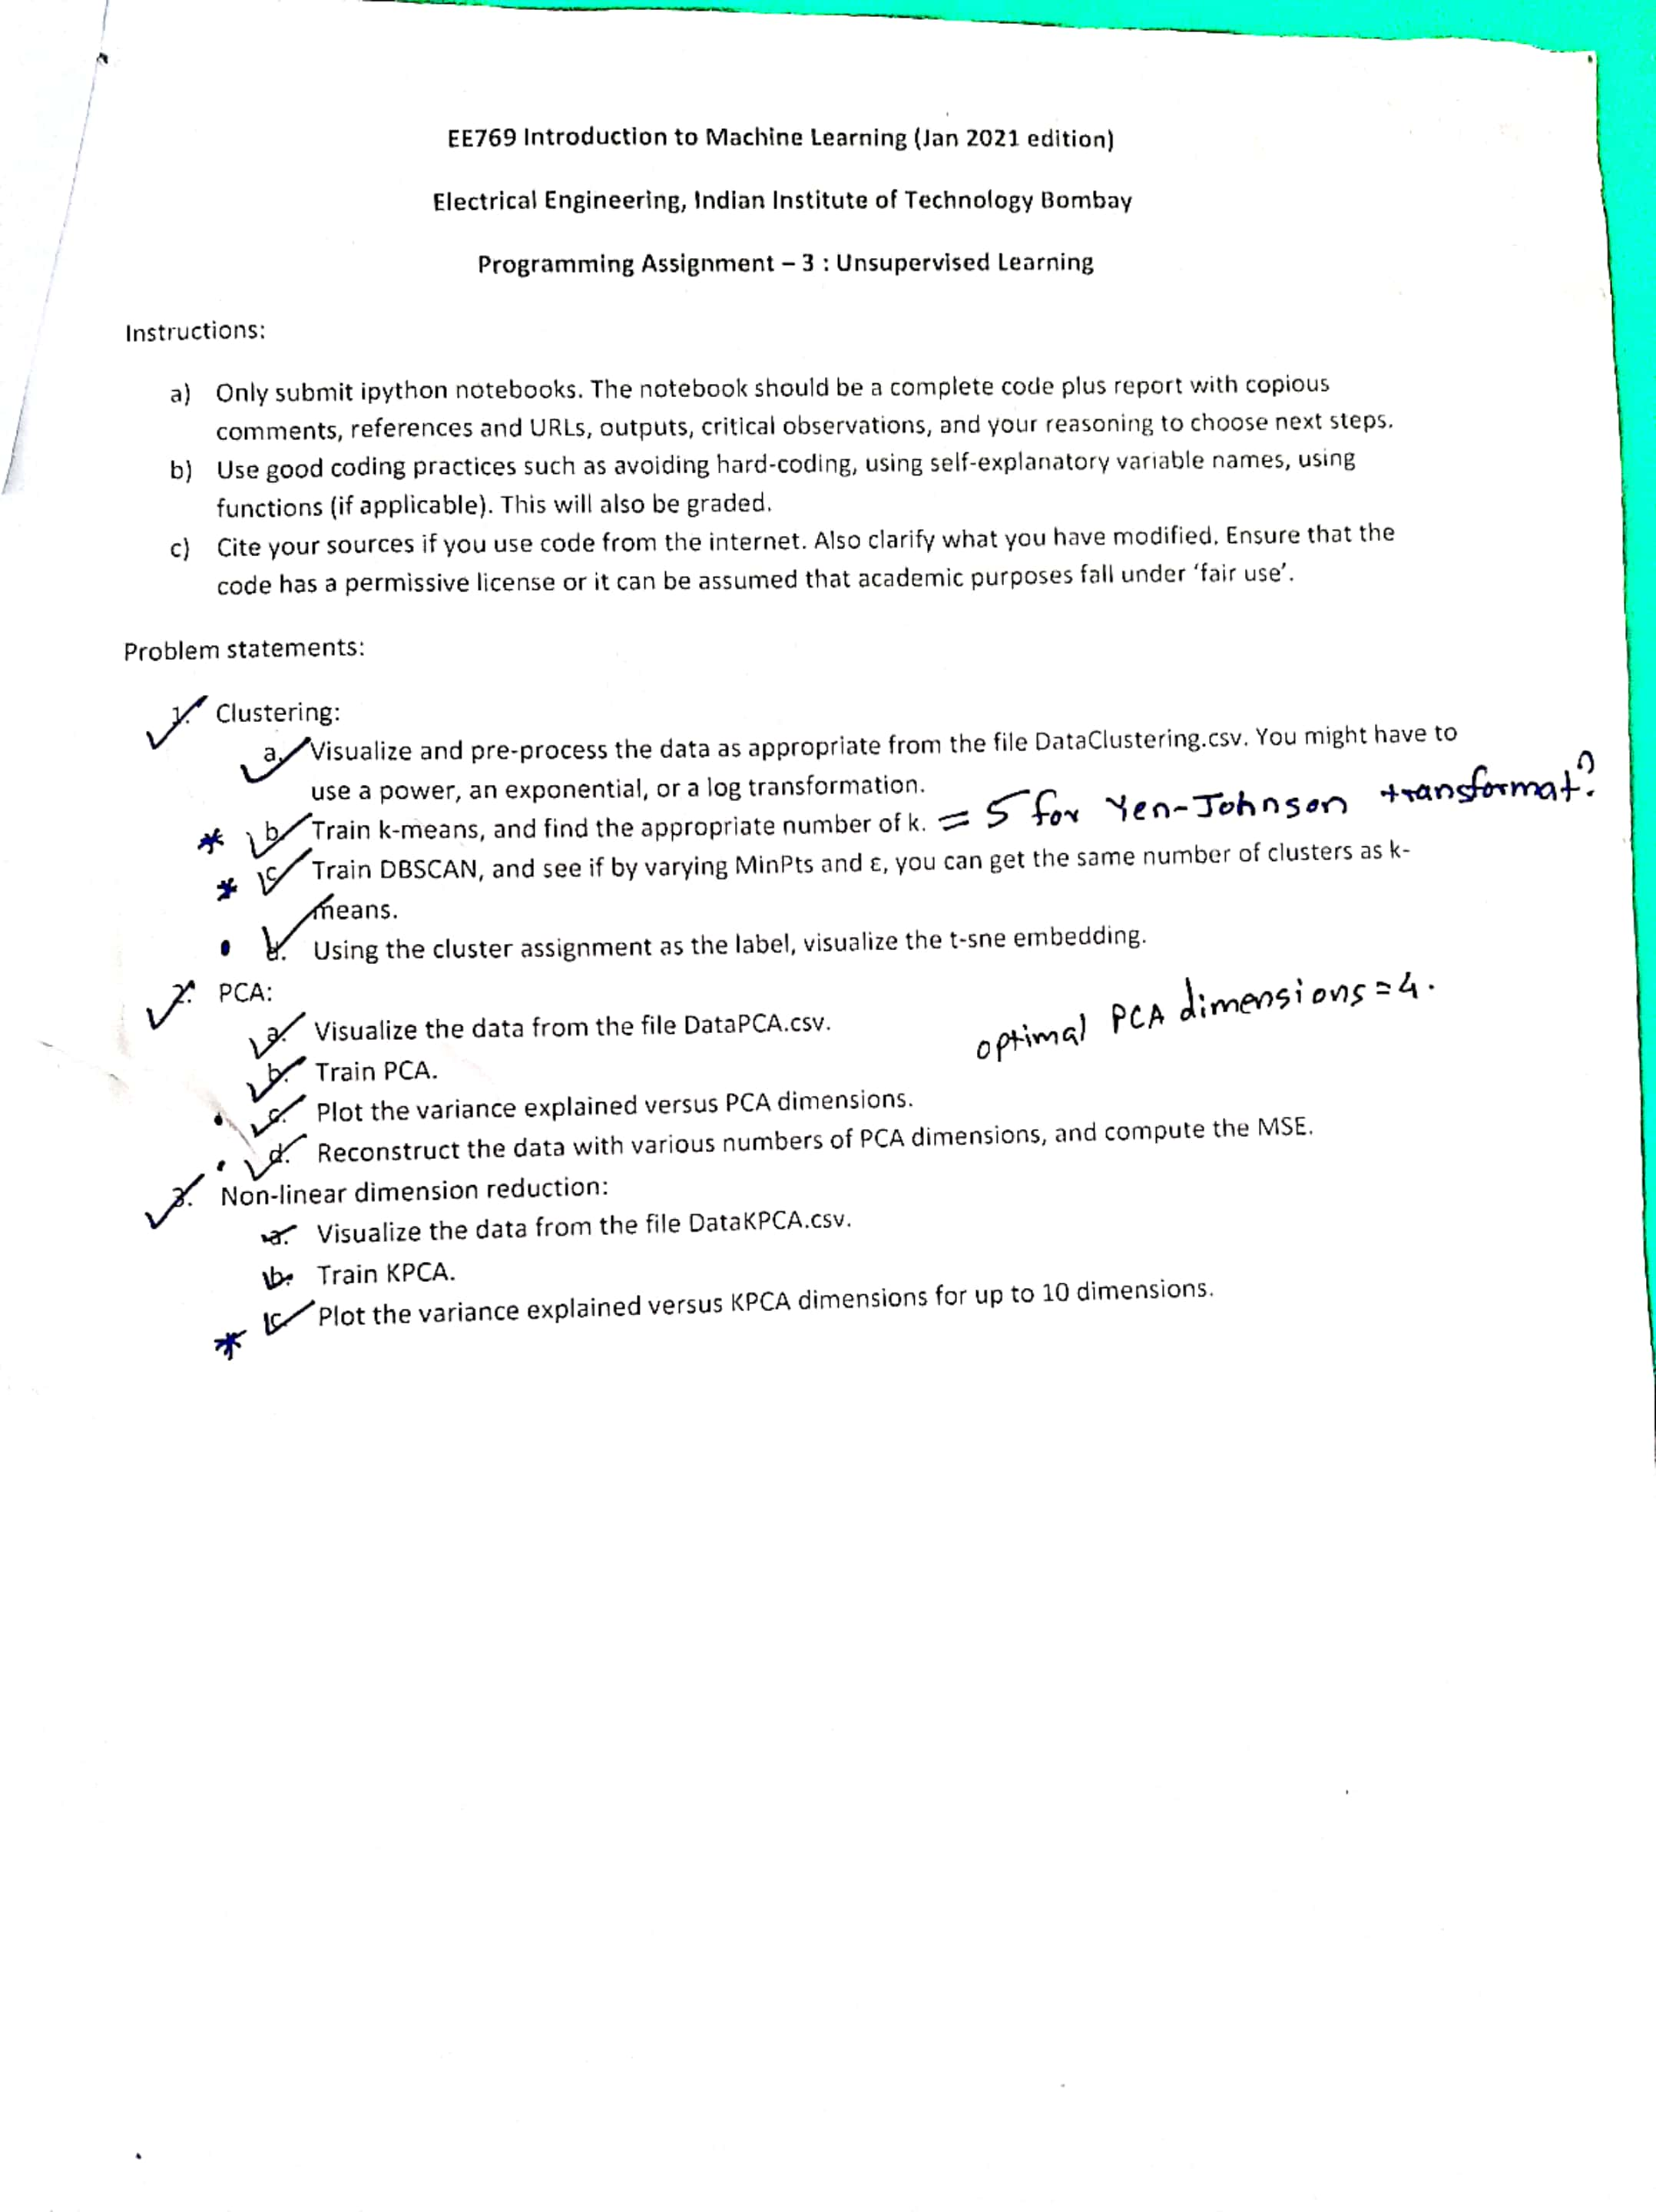

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.decomposition import PCA   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preliminary data processing

## Read data

In [ ]:
# Read into pandas dataframe
as_read_data_df = pd.read_csv('/content/drive/MyDrive/EE 769/Assignment data/Assignment 3 data/DataPCA.csv')

# Display
display(as_read_data_df)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


## Data types

In [ ]:
as_read_data_df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object

In [ ]:
as_read_data_df.dtypes.value_counts()

float64    7
dtype: int64

## Unique values

In [ ]:
as_read_data_df.nunique()

x1    190
x2    190
x3    190
x4    190
x5    190
x6    190
x7    190
dtype: int64

Observation:
1. All variables are continuous numerical.

## Missing values

In [ ]:
as_read_data_df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

Observations:
1. No missing values in the data.

# Exploratory data analysis

## Numerical descriptive statistics

In [ ]:
display(as_read_data_df.describe())
display(as_read_data_df.agg(['kurtosis', 'skew']))

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


,x1,x2,x3,x4,x5,x6,x7
kurtosis,-0.266996,0.162479,-0.112276,-0.198383,-0.216040,0.224880,0.087943
skew,0.019665,0.282829,0.136069,-0.124881,-0.053062,-0.115606,0.086518


Observations:
1. Skewness and kurtosis are close to 0 for most of the variables.

## Graphical descriptive statistics

### Pair Plots (Distributions and scatter plots)

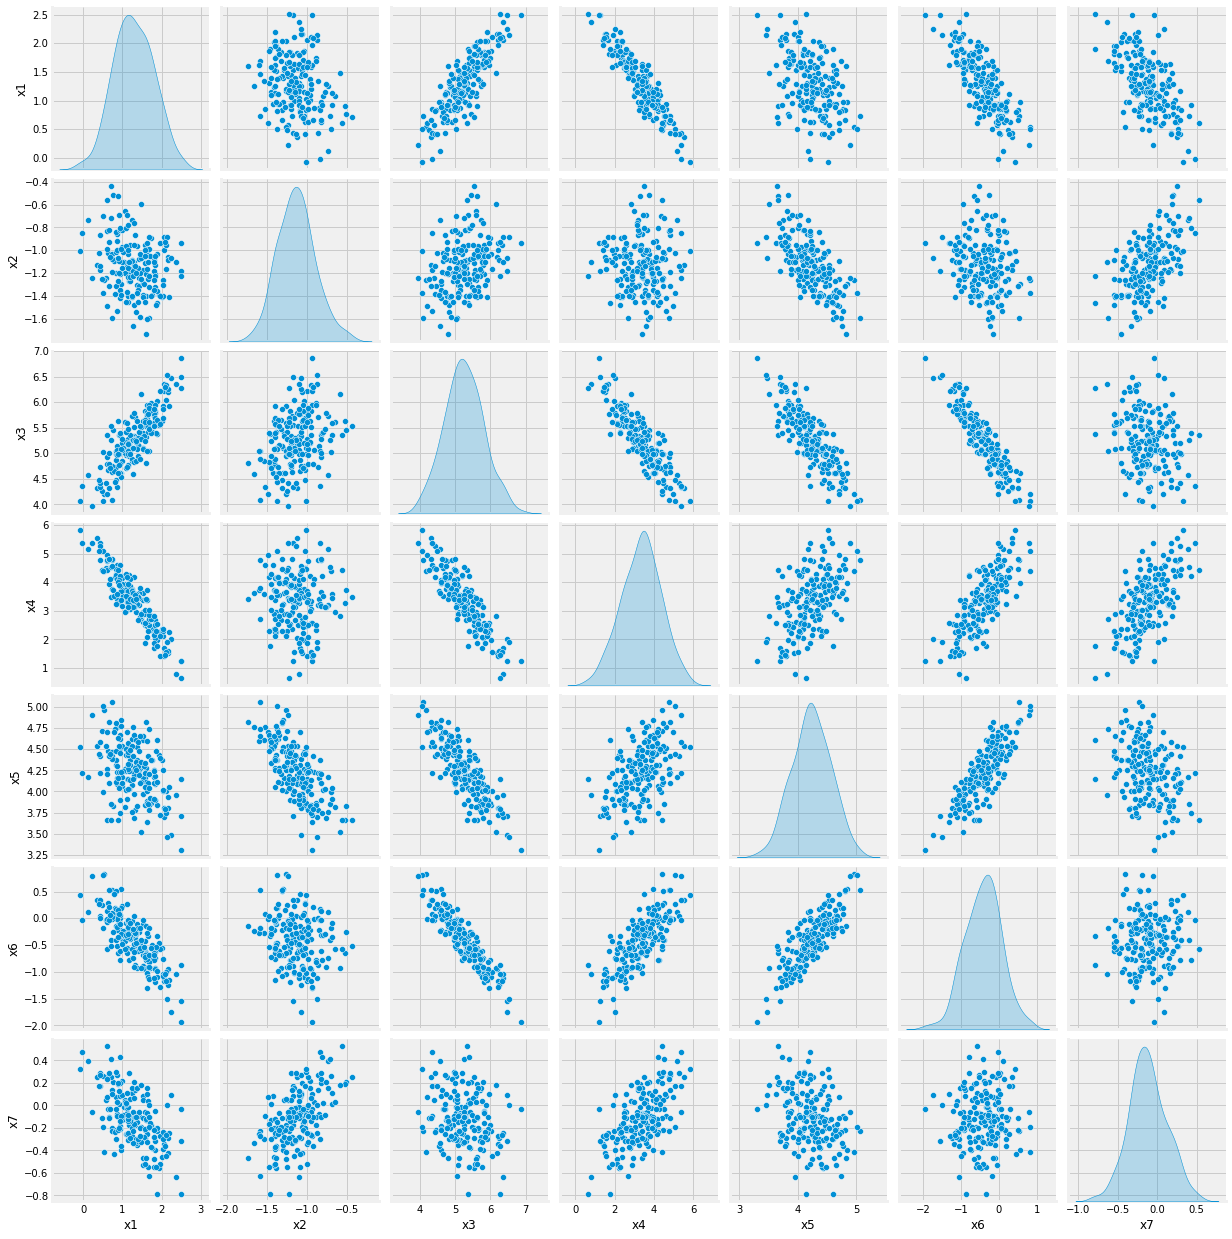

In [ ]:
sns.pairplot(data=as_read_data_df, diag_kind='kde')

Observations:
1. There seems to be correlation between few variables.
2. All of the variables are almost Gaussian-like.

### Correlation heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

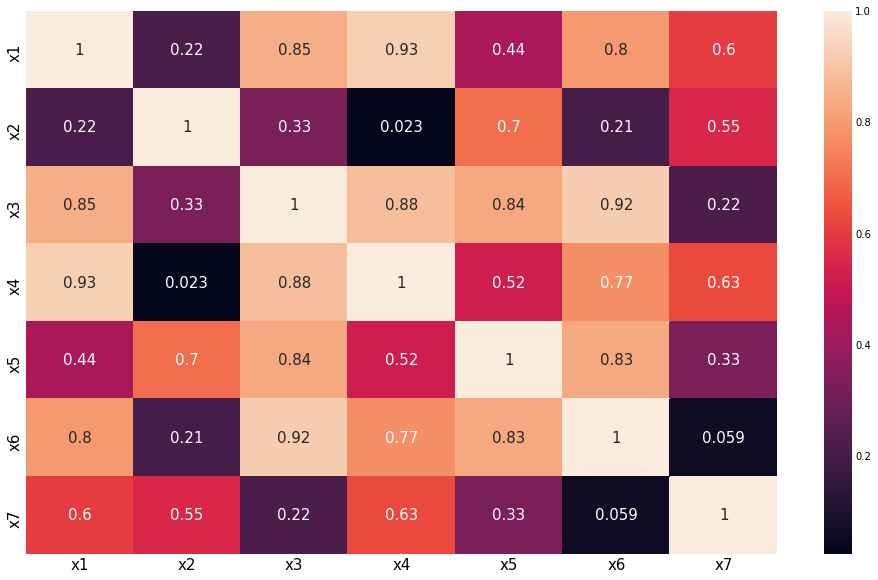

In [ ]:
# Calculate correlation matrix
correlation_matrix = as_read_data_df.corr()

# Plot absolute correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(abs(correlation_matrix), annot=True, annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Observations:
1. Very high correlation (0.92) between x3 and x6.
2. Very high correlation (0.93) between x1 and x4.
2. Many of the other varialbes are also highly correlated (>0.8).

### Boxplots

In [ ]:
def plot_boxplots(data_df):
    """
    - Tejas Chaudhari
    """

    # Get number of subplots and create figure & subplots array
    n_subplots = len(data_df.columns)
    figure, axes_array = plt.subplots(n_subplots, 1, figsize=(5, n_subplots*5))

    for i, column_name in enumerate(data_df.columns):
        sns.boxplot(data=data_df[column_name], ax=axes_array[i])
        axes_array[i].set_title(f'Boxplot of {column_name}')  # Set title
        axes_array[i].set_xlabel(column_name) # Set x-axis label
        axes_array[i].set_ylabel('Values') # Set y-axis label

    # Adjust spacing between subplots and show
    plt.tight_layout(pad=2)
    plt.show()

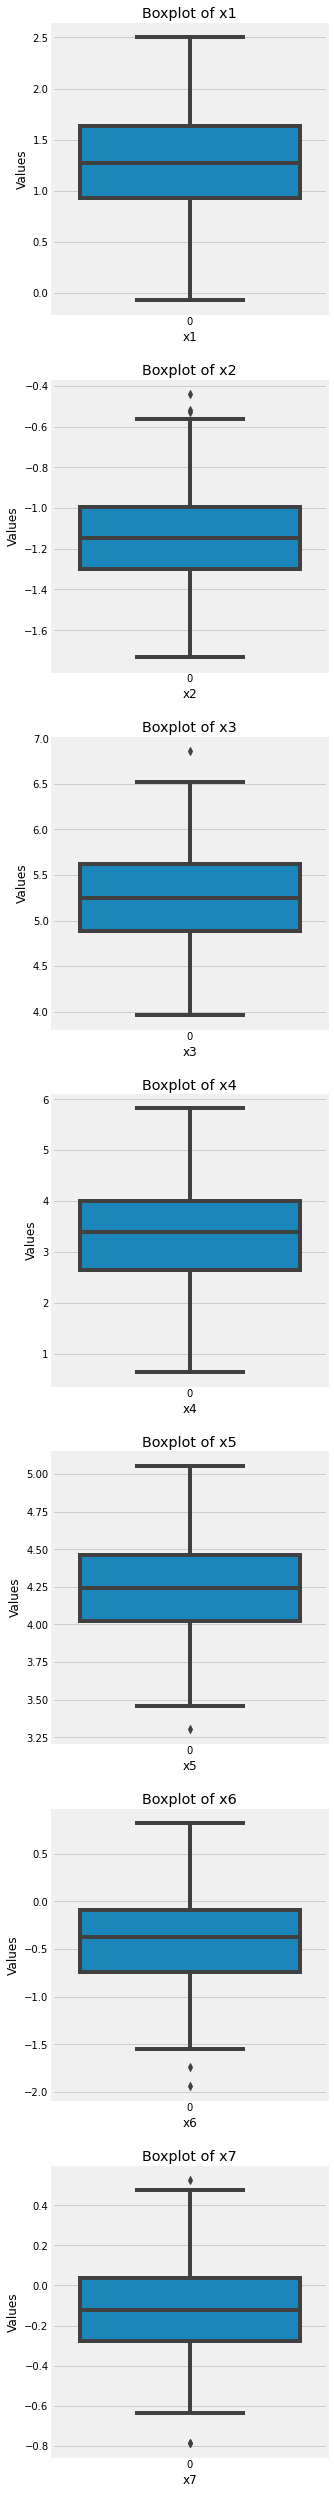

In [ ]:
plot_boxplots(as_read_data_df)

Observations:
1. Very few number of outliers are present in the variables.

# ML modelling

## Data preprocessing

### Train test split

In [ ]:
# Split data into train and test
X_train_df, X_test_df = train_test_split(as_read_data_df, test_size=0.15, random_state=7)

# Display train data
print('Train data:')
display(X_train_df.head(5))
print(X_train_df.shape)
print('--'*50)

# Display test data
print('Test data: ')
display(X_test_df.head(5))
print(X_test_df.shape)
print('--'*50)

Train data:


,x1,x2,x3,x4,x5,x6,x7
117,2.147208,-0.881430,6.524872,1.907626,3.457515,-1.505858,0.004677
66,1.140136,-1.000114,5.280836,3.706364,4.146129,-0.321291,-0.013396
113,1.589496,-1.054802,5.649090,2.571755,4.050855,-0.690740,-0.214778
120,1.351205,-1.183555,5.224972,2.954454,4.354377,-0.300329,-0.336496
31,1.609959,-1.208961,5.531218,2.884516,4.112227,-0.770488,-0.127345


(161, 7)
----------------------------------------------------------------------------------------------------
Test data: 


,x1,x2,x3,x4,x5,x6,x7
22,1.525766,-1.287821,5.394280,3.617284,4.157934,-0.692609,0.052682
177,1.340368,-1.198402,5.244087,3.403789,4.247855,-0.466139,-0.100312
46,1.395481,-1.347436,5.158178,3.560450,4.279034,-0.603797,-0.065622
63,0.495053,-1.370521,4.056807,5.087583,5.008641,0.813104,-0.192938
24,0.537750,-1.257620,4.194325,4.406185,4.967074,0.823165,-0.412723


(29, 7)
----------------------------------------------------------------------------------------------------


### Standardization

Useful resource
1. Do we standardize for PCA? - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [ ]:
# Create standard scaler model instance
standard_scaler_model = StandardScaler()

# Fit scaler model on train data
fitted_standard_scaler_model = standard_scaler_model.fit(X_train_df)

# Scale train data
scaled_X_train_array = fitted_standard_scaler_model.transform(X_train_df)

# Convert to dataframe
scaled_X_train_df = pd.DataFrame(scaled_X_train_array, columns=X_train_df.columns, index=X_train_df.index)

# Confirmation of scaled train data
print('Scaled train data:')
display(scaled_X_train_df.agg(['mean', 'std']))
display(scaled_X_train_df.agg(['mean', 'std']).mean(axis=1))
print('--'*50)

# Scale test data
scaled_X_test_array = fitted_standard_scaler_model.transform(X_test_df)

# Convert to dataframe
scaled_X_test_df = pd.DataFrame(scaled_X_test_array, columns=X_test_df.columns, index=X_test_df.index)

# Confirmation of scaled test data
print('Scaled test data:')
display(scaled_X_test_df.agg(['mean', 'std']))
display(scaled_X_test_df.agg(['mean', 'std']).mean(axis=1))
print('--'*50)


Scaled train data:


,x1,x2,x3,x4,x5,x6,x7
mean,-1.675678e-16,3.406523e-16,9.257605e-16,-1.958406e-16,7.340574e-16,3.413419e-17,-4.137477e-18
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00


mean    2.381512e-16
std     1.003120e+00
dtype: float64

----------------------------------------------------------------------------------------------------
Scaled test data:


,x1,x2,x3,x4,x5,x6,x7
mean,-0.155037,0.166470,-0.107637,0.092419,0.136719,0.317628,-0.090169
std,1.037276,1.118354,1.022306,1.044142,1.126384,1.163738,1.196768


mean    0.051485
std     1.101281
dtype: float64

----------------------------------------------------------------------------------------------------


### Store final train and test data

In [ ]:
# Train data for ML modelling
X_train = scaled_X_train_df.copy(deep=True)

# Test data for ML modelling
X_test = scaled_X_test_df.copy(deep=True)

## PCA

Useful resources:
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
2. https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

### Projection of train and test data

In [ ]:
# Create model instance
pca_model = PCA(random_state=7) # if n_components is not set all components are kept

# Fit the model on training data
fitted_pca_model = pca_model.fit(X_train)

# Project train data
projected_X_train_array = fitted_pca_model.transform(X_train)

# Convert to dataframe
projected_X_train_df = pd.DataFrame(projected_X_train_array, index=X_train.index).add_prefix('Projected feature ')

# Display
print('Projected train data:')
display(projected_X_train_df.head(5))
print('--'*75)

# Project test data
projected_X_test_array = fitted_pca_model.transform(X_test)

# Convert to dataframe
projected_X_test_df = pd.DataFrame(projected_X_test_array, index=X_test.index).add_prefix('Projected feature ')

# Display
print('Projected test data:')
display(projected_X_test_df.head(5))
print('--'*75)

Projected train data:


,Projected feature 0,Projected feature 1,Projected feature 2,Projected feature 3,Projected feature 4,Projected feature 5,Projected feature 6
117,4.439757,1.637549,-0.537128,0.235924,0.025519,-0.003286,0.001296
66,-0.312311,0.866238,0.218461,0.203340,0.076297,0.021786,0.011631
113,1.494955,0.002238,0.316835,-0.035675,0.013163,-0.009866,0.004467
120,0.042164,-0.969799,0.610680,-0.127288,0.066601,0.005540,0.000199
31,1.131817,-0.201242,-0.478033,-0.020003,-0.032401,-0.001668,-0.001297


------------------------------------------------------------------------------------------------------------------------------------------------------
Projected test data:


,Projected feature 0,Projected feature 1,Projected feature 2,Projected feature 3,Projected feature 4,Projected feature 5,Projected feature 6
22,0.308013,0.145643,-1.193696,0.288397,-0.054382,0.017811,-0.003600
177,-0.050508,-0.138386,-0.256170,0.033318,-0.005891,-0.004136,0.004908
46,-0.153289,-0.455187,-0.950473,-0.057858,0.031226,-0.012464,0.006517
63,-4.710646,-1.455087,0.606853,0.236406,-0.000824,-0.000885,0.005789
24,-3.988884,-1.807058,1.593789,-0.023158,0.119363,-0.001639,0.004406


------------------------------------------------------------------------------------------------------------------------------------------------------


### Cumulative explained variance vs PCA dimensions

Text(0, 0.5, 'Cumulative explained variance')

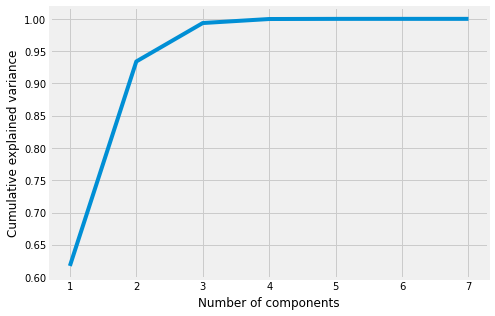

In [ ]:
# Get number of features and cumulative explained variance %
n_components_list = np.arange(start=1, stop=len(projected_X_train_df.columns)+1, step=1)
cumulative_exaplained_variance_ratios_list = np.cumsum(fitted_pca_model.explained_variance_ratio_)

# Plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=n_components_list, y=cumulative_exaplained_variance_ratios_list)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Observations:
1. Almost all the variance of the 7 features is explained by just 3 features.

### Recontruction and reconstruction MSE for various number of PCA dimensions.



In [ ]:
def plot_reconstruction_mse_vs_PCA_dimensions(X_train, n_components_list, random_state=7, display_dataframes=False):
    # Initiate lists to store reconstruction errors
    reconstruction_MSE_for_n_dimensions_list = []

    # Calculate reconectruction MSE for different number of dimensions
    for current_n_components in n_components_list:
        # Create model instance
        pca_model = PCA(n_components=current_n_components, random_state=random_state)

        # Fit the model
        fitted_pca_model = pca_model.fit(X_train)

        # Project train data
        projected_X_train_array = fitted_pca_model.transform(X_train)

        # Convert to dataframe
        projected_X_train_df = pd.DataFrame(projected_X_train_array, index=X_train.index).add_prefix('Projected dimension ')

        # Display
        if display_dataframes == True:
            print('Projected train data:')
            display(projected_X_train_df.head(5))
            print(projected_X_train_df.shape)
            print('--'*50)

        # Reconstruct train data
        reconstructed_X_train_array = fitted_pca_model.inverse_transform(projected_X_train_df)

        # Convert to dataframe
        reconstructed_X_train_df = pd.DataFrame(reconstructed_X_train_array, index=projected_X_train_df.index).add_prefix('Reconstructed dimension ')

        # Display
        if display_dataframes == True:
            print('Reconstructed train data:')
            display(reconstructed_X_train_df.head(5))
            print(reconstructed_X_train_df.shape)
            print('--'*50)

        # Calculate and store reconstruction MSE
        current_reconstruction_MSE = ((reconstructed_X_train_df.to_numpy() - X_train.to_numpy())**2).mean()
        reconstruction_MSE_for_n_dimensions_list.append(current_reconstruction_MSE)

    # Plot
    sns.lineplot(x=n_components_list, y=reconstruction_MSE_for_n_dimensions_list)
    plt.xlabel('Number of PCA dimensions (components)')
    plt.ylabel('Reconstruction MSE')

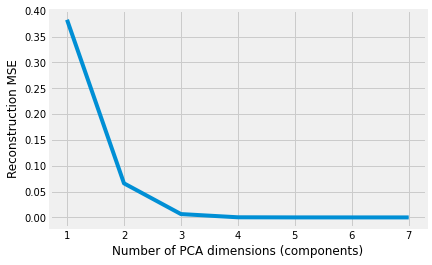

In [ ]:
# Set inputs
n_components_list = [1, 2, 3, 4, 5, 6, 7]

# Call the function to plot
plot_reconstruction_mse_vs_PCA_dimensions(X_train=scaled_X_train_df, n_components_list=n_components_list)

Observations:
1. Almost all the variance of the 7 features is explained by just 3 features.
2. Result consistent with explained variance vs number of components plot.

# Credits

1. [EE 769: Module 11.2 Dimention Reduction - Principal Component Analysis](https://youtu.be/qg0y3rPMc-8?list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6)

2. Dataset: EE 769 instructor ( [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)) and teaching assistants

3. [Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)

# Useful resources:

1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

2. https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

3. Do we standardize for PCA? - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html